
# <p style="text-align: center;">EE 461P: Data Science Principles</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 55</p>
## <p style="text-align: center;">Due: Tuesday, October 3rd, submitted via Canvas by 11:59 pm</p>

## Scott Fennell sp363
## Xiaoyong Liang xl5432

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Ridge and Lasso Regression (15 points)
Use the following codes to import the diabetes dataset.

In [1]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

The dataset consists of ten features and one target variable.  More information is found at http://scikit-learn.org/stable/datasets/index.html#diabetes-dataset

After importing the datasets, use the following code to add additional second-order polynomial and interaction variables to the features matrix.  You should have 65 variables and one target variable. Note that this code adds all combinations of the features with degree less than or equal to two; in practice one may introduce only a few based on domain knowledge or experimentation.

In [2]:
from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

In this question, you will explore the application of Lasso and Ridge regression using sklearn package in Python. The following code will split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 20** and **test_size = 0.33**.  Note: lambda is called alpha in sklearn.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=20)

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MSE as the scoring metric. (5pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed? (4pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MSE) on the test data for each. (3pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for 65 variables. What do you observe from these coefficients? (3pts)

## Answer

## a)

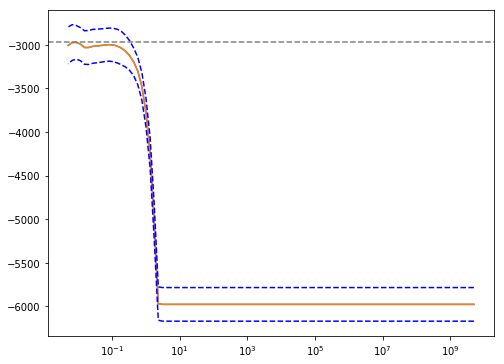

best lambda {'alpha': 0.008737642000038414}
best score -2972.4628255


In [4]:
# Tutorial learned from http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html

#lasso
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

alphas = 10**np.linspace(10,-2,100)*0.5

k_fold = KFold(5)
lasso = Lasso()

clf_lasso = GridSearchCV(lasso, [{'alpha': alphas}],scoring='neg_mean_squared_error',cv=k_fold, refit=False)
clf_lasso.fit(X_train, y_train)

scores = clf_lasso.cv_results_['mean_test_score']
scores_std = clf_lasso.cv_results_['std_test_score']


plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

scores_std = clf_lasso.cv_results_['std_test_score']
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(5)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.show()

print ('best lambda',clf_lasso.best_params_)
print ('best score', np.max(scores))

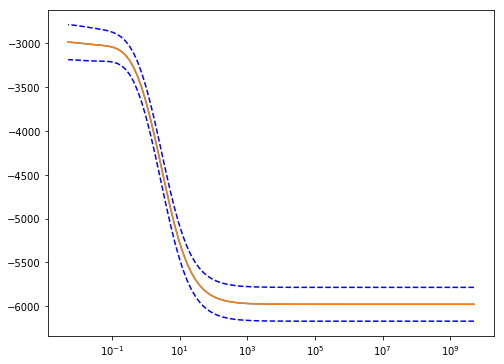

best lambda {'alpha': 0.0050000000000000001}
best score -2988.32477283


In [5]:
# Tutorial learned from http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html


#ridge
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

alphas = 10**np.linspace(10,-2,100)*0.5


ridge = Ridge()

k_fold = KFold(5)

clf_ridge = GridSearchCV(ridge, [{'alpha': alphas}],scoring='neg_mean_squared_error',cv=k_fold, refit=False)
clf_ridge.fit(X_train, y_train)

scores = clf_ridge.cv_results_['mean_test_score']
scores_std = clf_ridge.cv_results_['std_test_score']

plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

scores_std = clf_ridge.cv_results_['std_test_score']
plt.semilogx(alphas, scores)
# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(5)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

plt.show()

print ('best lambda',clf_ridge.best_params_)
print ('best score', np.max(scores))

## b)

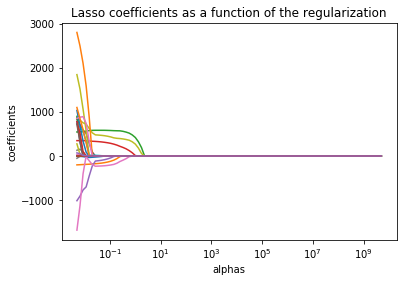

In [6]:
# Tutorial learned from http://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html

from sklearn import linear_model

#%pylab inline

#lasso
alphas = 10**np.linspace(10,-2,100)*0.5

coefs = []
for a in alphas:
    lasso = linear_model.Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log') 
plt.xlabel('alphas')
plt.ylabel('coefficients')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

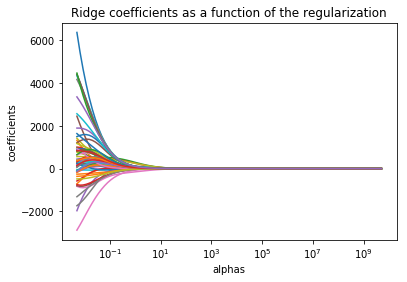

In [7]:
# Tutorial learned from http://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html

#ridge
alphas = 10**np.linspace(10,-2,100)*0.5

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alphas')
plt.ylabel('coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

The ridge coefficients are more scattered before they converge to 0, and it also takes longer for ridge coefficients to converge to 0. In general, the coefficients converges to zero as alpha increases.

## c)

In [8]:
from sklearn.metrics import mean_squared_error

#least squares regression
reg = linear_model.LinearRegression()
reg.fit (X_train,y_train)
y_pred_linear = reg.predict(X_test)
linear_mse=mean_squared_error(y_test, y_pred_linear)
print ('linear mse =',linear_mse)

#ridge

ridge = linear_model.Ridge(alpha=clf_ridge.best_params_.get('alpha'))
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
ridge_mse=mean_squared_error(y_test, y_pred_ridge)
print ('ridge mse =',ridge_mse)

#lasso

lasso = linear_model.Lasso(alpha=clf_lasso.best_params_.get('alpha'))
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
lasso_mse=mean_squared_error(y_test, y_pred_lasso)
print ('lasso mse =',lasso_mse)

linear mse = 3501.51672513
ridge mse = 2946.79477072
lasso mse = 2961.43759012


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


## d)

In [9]:
LassoCV=linear_model.LassoCV(alphas=None, cv=10, max_iter=10000)
LassoCV.fit(X_train, y_train)
y_pred_lasso = LassoCV.predict(X_test)
print ('best lambda:',LassoCV.alpha_)

lasso = linear_model.Lasso(alpha=LassoCV.alpha_)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
lasso_mse=np.mean((y_pred_lasso-y_test)**2)

print ('Lasso mse :', np.mean((y_pred_lasso-y_test)**2))
print ('coeff:',lasso.coef_)

best lambda: 0.00642100472994
Lasso mse : 2971.81006562
coeff: [   -6.41033505  -197.57695949   546.9846375    348.23882294  -920.20114717
   726.91383711    31.98462597   -14.80954929   817.15834216     5.94086981
     0.          2527.81172745     0.             0.             0.            -0.
     0.             0.          1554.85141873    -0.            -0.             0.
   496.50450943     0.             0.             0.         -1188.61168992
     0.             0.           664.16443725   724.09506593     0.             0.
     0.             0.             0.           875.45007512   151.45850921
    66.59384692     0.           374.64761997    -0.             0.            -0.
     0.             0.             0.            -0.             0.             0.
    -0.            -0.            -0.           546.68065867     0.
   369.98354682    -0.             0.             0.            -0.            -0.
   875.26885833    -0.             0.            54.6764378 ]


The best lambda is 0.00642100472994, and it is close to the best lambda with KFold(5) in part 1.

More than half of hte coefficients are very close to 0, and 24 coefficients are non-zero.

# Question 2  (5 pts)

A regression model that includes "interaction terms" (i.e. quadratic terms of the form $x_ix_j$) as predictors in addition to the linear terms is clearly more general than a corresponding model that employs the same independent variables but only uses the linear terms. Outline two situations where the simpler (less general) model would be preferred to the more powerful model that includes interactive terms.

## Answer



Situation 1: Simpler model would be preferred when the quadratic model overfits the data.

Situation 2: Simpler model would be preferred when the interactive terms are not important, and penalize the scoring metrics or MSE.


# Question 3 - Bias-variance Trandeoff (2pts)
How does the choice of K in the K-nearest neighbor classifier reflect a bias-variance tradeoff?

## Answer

In K-Nearest Neighbor, as K increases, the bias increases but the variance decreases. As K decreases, the bias decreases but the variance increases. 

# Question 4: Data Exploration and Regression Analysis (4+3+4+4=15pts)

Consider the dataset provided (russett_full_v2.csv) about agricultural inequality, industrial development and political instability in different countries. More information about it can be found [here](https://www.rdocumentation.org/packages/plspm/versions/0.4.9/topics/russett) though the data itself is slightly different than that referenced in the link.

a) (4 points) Generate box-plots of the "rent" (% of farmers that rent all their land) and "demo_score" ( derived measure of the level of a country's democracy from 1945 to 61 ) and identify the cutoff values for outliers. 

Generate 2 scatterplots of "rent" against "demo_score", and "inst" against "demo_score" with the identified outliers colored differently than non-outliers in each; comment on how inclusion of the outliers would affect a predictive model for the "demo_score" response.  

b) (3 points) Let us try to fit an MLR, using ordinary least squares, to this dataset with "demo_score" as the dependent variable using only the predictors 'rent','inst', and 'ecks' . 

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=10)   

Report the RMSE obtained on both X_train and X_test. How much does this increase when you score your model on X_test?

c) (4 points ) Try to predict ”demo_score” using a robust regression using Huber loss.  You can use the [sklearn package](  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).  Set regularization parameter alpha to 0.0 and all other parameters as default.
Report RMSE obtained on both X_train and X_test.

d) (4 points ) Compare and comment on the model fits obtained in (b) and (c) and plot the residual plots using all data for each model. How do outliers affect the relative performance of ordinary least squares regression, and robust regression with Huber loss in general? 

## a)

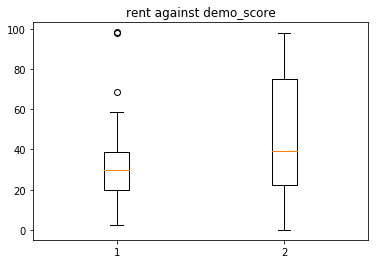

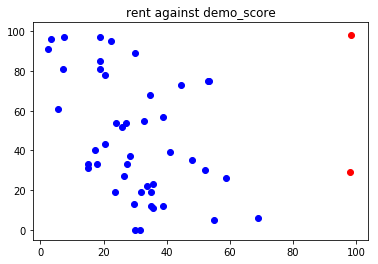

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("./russett_full_v2.csv")

plt.boxplot([df['rent'], df['demo_score']])
plt.title('rent against demo_score')

plt.figure()
rent_std = np.std(df['rent'])
bound = rent_std + df['rent'].quantile(0.90)
    
df_normal = df.loc[np.abs(df['rent']) <bound]
df_outlier = df.loc[np.abs(df['rent']) >=bound]

plt.scatter(df_normal['rent'], df_normal['demo_score'], c='b')
plt.scatter(df_outlier['rent'], df_outlier['demo_score'], c='r')
plt.title('rent against demo_score')
plt.show()

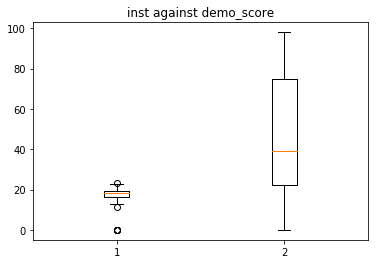

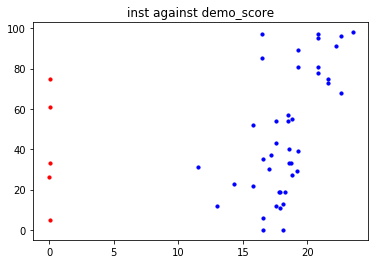

In [11]:
plt.boxplot([df['inst'], df['demo_score']])
plt.title('inst against demo_score')

inst_std = np.std(df['inst'])
bound = inst_std - df['inst'].quantile(0.05)

df_normal = df.loc[np.abs(df['inst']) >=bound]
df_outlier = df.loc[np.abs(df['inst']) <bound]

plt.figure()

plt.scatter(df_normal['inst'], df_normal['demo_score'], s=10, c='b')
plt.scatter(df_outlier['inst'], df_outlier['demo_score'], s=10, c='r')
plt.title('inst against demo_score')
plt.show()

## b)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import math

X = df[['rent','inst', 'ecks']]
y = df['demo_score']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=10)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)
rmse_train = math.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = math.sqrt(mean_squared_error(y_test, y_pred_test))
print('Linear Regression RMSE on X_train: ', rmse_train)
print('Linear Regression RMSE on X_test: ', rmse_test)

Linear Regression RMSE on X_train:  25.55900184499996
Linear Regression RMSE on X_test:  33.50125180607724


## c)

In [13]:
from sklearn.linear_model import HuberRegressor
import math

huber = HuberRegressor(alpha=0.0)
huber.fit(X_train, y_train)
y_pred_hub_train = huber.predict(X_train)
y_pred_hub_test = huber.predict(X_test)
rmse_train = math.sqrt(mean_squared_error(y_train, y_pred_hub_train))
rmse_test = math.sqrt(mean_squared_error(y_test, y_pred_hub_test))

print('Huber Regression RMSE on X_train: ', rmse_train)
print('Huber Regression RMSE on X_test:', rmse_test)

Huber Regression RMSE on X_train:  26.43390552290458
Huber Regression RMSE on X_test: 30.95435264033435


## d)

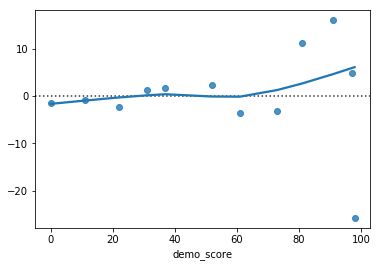

In [14]:
#tutorial learned from https://seaborn.pydata.org/examples/residplot.html
from seaborn import residplot
residplot(x = y_test, y = y_pred_test,lowess=True)

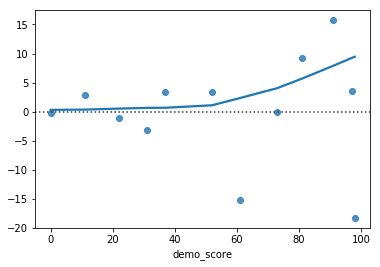

In [15]:
residplot(x = y_test, y = y_pred_hub_test,lowess=True)

# Question 5 - Sampling (4+4=8pts)

1. NBC has come up with an extreme TV show, and each of its viewers either likes or hates it. (no middle ground here; we are in a “black and white age”). NBC wants to estimate what fraction p of its audience like the show by “randomly” calling n viewers and tallying their responses so as to estimate the true value of p to a fractional accuracy of within ±ε%, with a confidence of (1 − α) × 100%. For α = 0.10, ε = 0.03 (i.e. your answer will be $\hat{p}$± 0.03), what is the minimum value of n needed if true value (i) p = 0.5, (ii) p=0.25? 

2. Suppose for a certain value of p and choice of ε, you calculate that you will need 1000 samples for α = 0.02. You now decide to obtain a more accurate answer by either (i) reducing α to 0.01, keeping the same ε or by (ii) reducing ε by a factor of 2 from the original value, and increasing α to 0.05. In each case how many samples would you need now?

## Answer

In [16]:
# n = p(1-p) (za/2 / e ) ^ 2
# http://www.math.armstrong.edu/statsonline/5/5.3.2.html

def minimumN(epsilon, p, z):
    return p*(1 - p) * (z/epsilon)**2
z10 = 1.28
z05 = 1.645
z025 = 1.96
z01 = 2.33
z005 = 2.58


N1 = 0.5 * 0.5 * (z05 / 0.03 ) ** 2
N2 = 0.25 * 0.75 * (z05 / 0.03 ) ** 2
myEps = 0.0368405

N3 = 1000 * (z005 **2) / (z01**2)

N4 = 1000 * (z025 **2) / (z01**2) * 4


print (minimumN(.03, .5, z05))
print (minimumN(.03, .25, z05))
print (N3)
print (N4)

751.6736111111112
563.7552083333334
1226.1047357659932
2830.4813129731615


1) When p=0.5, n should be 752, when p=0.25, n should be 564

2) (i) 1227 (ii) 2831

# Question 6 - Principal Component Analysis (10 points)

Import the diabetes dataset as in Q1 and add the interaction variables.
You should have 65 variables and one target variable.

In [17]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

Next, use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to center and scale each feature as follows.

In [18]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
X = stdScaler.fit_transform(X)

(a) Perform PCA using the sklearn [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) package.  Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix).  Refer to Figure 10.4 of JW for an example.  You may use the output attribute *explained variance ratio*. (3pts)

(b) How many principal components (N1, N2, N3) are required to explain cumulative variance of 30%, 60%, and 90%, respectively? (3pts)

(c) Fit an ordinary least squares linear regression using N1, N2, and N3 number of principal components, respectively.  (This is called Principal Components Regression). Use entire dataset, e.g. 442 rows. Evaluate the models using mean squared error (MSE). (4pts)

## Answer

## a)

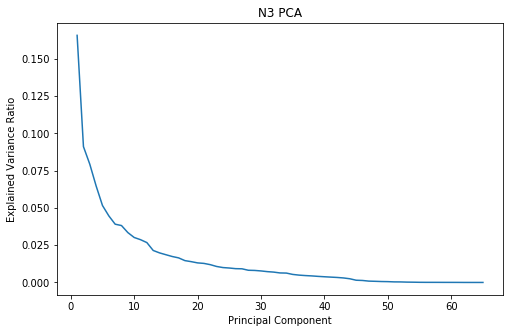

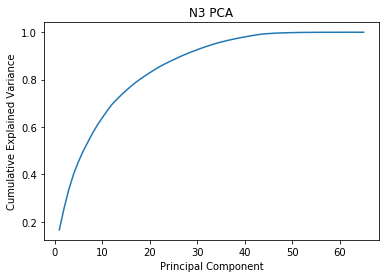

In [19]:
# scree plot learned from https://stats.stackexchange.com/questions/12819/how-to-draw-a-scree-plot-in-python

def cumulative(arr):
    foo = []
    for x in range(0, len(arr)):
        foo.append(arr[x])
        for y in range (0, x):
            foo[x] = foo[x] + arr[y]
    return foo
            

numPC = 65


from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
X = stdScaler.fit_transform(X)

from sklearn.decomposition import PCA

pca = PCA(n_components= numPC)
pca.fit(X)
PCA(copy=True, iterated_power='auto', n_components=numPC, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False) 

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#Make a random array and then make it positive-definite


fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(numPC) + 1
#
plt.plot(sing_vals, pca.explained_variance_ratio_)
plt.title('N3 PCA')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

plt.plot(sing_vals, cumulative(pca.explained_variance_ratio_))
plt.title('N3 PCA')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.show()

## b)

In [20]:
def calculateN(percentage):
    pca = PCA()
    pca.fit(X)
    cul = 0
    i = 0
    while cul < percentage:
        i+=1
        pca = PCA(n_components=i)
        pca.fit(X)
        cul = sum(pca.explained_variance_ratio_)
    return i
N1 = calculateN(0.3)
N2 = calculateN(0.6)
N3 = calculateN(0.9)
print('N1 =', N1, 'for cumulative variance of 30%, N2 =',N2, 'for cumulative variance of 60%, N3 =', N3,'for cumulative variance of 90%')

N1 = 3 for cumulative variance of 30%, N2 = 9 for cumulative variance of 60%, N3 = 27 for cumulative variance of 90%


## c)

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

pca = PCA(N1)
X_reducedN1 = pca.fit_transform(X)
pca = PCA(N2)
X_reducedN2 = pca.fit_transform(X)
pca = PCA(N3)
X_reducedN3 = pca.fit_transform(X)


regr = LinearRegression()

regr.fit (X_reducedN1,y)
y_predN1 = regr.predict(X_reducedN1)
msen1 = mean_squared_error(y, y_predN1)

regr.fit (X_reducedN2,y)
y_predN2 = regr.predict(X_reducedN2)
msen2 = mean_squared_error(y, y_predN2)

regr.fit (X_reducedN3,y)
y_predN3 = regr.predict(X_reducedN3)
msen3 = mean_squared_error(y, y_predN3)

print('mse for n1=3 is ', msen1, ', mse for n2=9 is ', msen2, ', mse for n3=27 is ', msen3)

mse for n1=3 is  5120.60554779 , mse for n2=9 is  3942.78675143 , mse for n3=27 is  2857.425949
